# Quantum Galton Box: Binomial to Gaussian with Grover-Rudolph Method

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.1); font-family: Arial, sans-serif; color: #34495e; font-size: 16px; max-width: 100%; width: 100%; overflow-wrap: break-word; word-break: break-word; box-sizing: border-box">
  <h1 style="color: #2c3e50; font-size: 24px;">Task 2: Quantum Galton Box Simulation</h1>

  <p>
    This notebook implements a quantum circuit for a Galton Box with <i>n</i> layers, encoding a binomial distribution using the Grover-Rudolph method.
  </p>

  <div style="text-align: center; font-size: 18px; margin: 10px 0; color: #2c3e50; word-break: break-word;">
    <b><i>p(k) = C(n, k) / 2ⁿ</i></b>
  </div>

  <p>
    We verify its approximation to a Gaussian distribution and compare it to a classical Monte Carlo simulation for efficiency and accuracy. The project aligns with UN SDG 9 (Industry, Innovation, and Infrastructure) by advancing quantum algorithm development for scalable simulations.
  </p>
</div>

---

## 1. Introduction

<div style="background-color: #e8f4f8; padding: 15px; border-left: 5px solid #3498db; border-radius: 8px; 
box-shadow: 0 4px 6px rgba(0,0,0,0.05); margin-bottom: 20px; font-family: Arial, sans-serif;
color: #34495e; font-size: 16px; max-width: 100%; width: 100%; word-wrap: break-word; box-sizing: border-box;">

  <h2 style="color: #2c3e50;">Problem Statement</h2>

  <p style="font-size: 14px; color: #34495e;">
    The Galton Box models a binomial distribution through a pegboard where balls fall, approximating a Gaussian distribution for large <i>n</i>. We aim to:
  </p>

  <ul style="font-size: 14px; color: #34495e; margin-top: -10px;">
    <li>Develop a quantum circuit to prepare a state encoding <i>p(k) = C(n, k) / 2<sup>n</sup></i> using the Grover-Rudolph method.</li>
    <li>Verify the state approximates a Gaussian distribution.</li>
    <li>Compare quantum and classical Monte Carlo simulations for computational efficiency and accuracy.</li>
  </ul>

  <p style="font-size: 14px; color: #34495e;">
    <b>Impact:</b> Efficient quantum simulations can accelerate modeling in physics, finance, and sustainability, supporting scalable innovation.
  </p>
</div>

---

## 2. Theoretical Background

<div style="background-color: #fff3cd; padding: 15px; border-left: 5px solid #f1c40f; border-radius: 8px; 
box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif; color: #34495e; font-size: 16px;
max-width: 100%; width: 100%; word-wrap: break-word; box-sizing: border-box">Key Concepts</h2>

  <ul style="font-size: 14px; color: #34495e;">
    <li><b>Galton Box:</b> A physical system where balls fall through <i>n</i> layers of pegs, landing in bins with probabilities following a binomial distribution.</li>
    <li><b>Binomial to Gaussian:</b> For large <i>n</i>, the binomial distribution <i>p(k) = C(n, k) / 2<sup>n</sup></i> approximates a Gaussian via the Central Limit Theorem.</li>
    <li><b>Grover-Rudolph Method:</b> A quantum state preparation technique to encode probability distributions into quantum states using controlled rotations.</li>
    <li><b>Quantum Advantage:</b> Quantum circuits may reduce computational complexity for sampling distributions compared to classical methods.</li>
  </ul>
</div>

---

## 3. Setup and Dependencies

<div style="background-color: #e8f8f0; padding: 15px; border-left: 5px solid #27ae60; border-radius: 8px; 
box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif; color: #34495e; font-size: 16px; max-width: 100%; width: 100%; word-wrap: break-word; box-sizing: border-box;">

  <h2 style="color: #2c3e50;">Environment Setup</h2>

  <p style="font-size: 14px; color: #34495e;">
    Install required libraries and set up the environment for quantum and classical simulations.
  </p>

</div>

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
# from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram
from scipy.stats import binom, norm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom
from scipy.special import kl_div

# Styling for plots
plt.style.use('seaborn-v0_8')

---

## 4. Classical Monte Carlo Simulation

<div style="background-color: #f0f0f0; padding: 15px; border-left: 5px solid #7f8c8d; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif; max-width: 100%; overflow-wrap: break-word;">

  <h2 style="color: #2c3e50;">Classical Galton Box Simulation</h2>

  <p style="font-size: 14px; color: #34495e;">
    Simulate a Galton Box classically using Monte Carlo methods to generate a binomial distribution and measure runtime. This forms a benchmark for evaluating quantum-enhanced sampling and PDE solvers.
  </p>

</div>


---

### 🧠 Theoretical Foundation

The Galton Board is a physical analog of a discrete stochastic process. Each particle (ball) undergoes a series of $N$ binary decisions (left or right), where each deflection corresponds to a **Bernoulli trial** with probability $p = 0.5$. Over many iterations, the resulting particle distribution reflects the **binomial distribution**, which approaches a **Gaussian** as $N \to \infty$ due to the **Central Limit Theorem (CLT)**.

Let:

* $N$: number of layers (steps)
* $M$: number of particles (trials)
* $r$: number of rightward deflections
* $k = 2r - N$: net horizontal displacement

The probability of a particle landing in bin $k$ is given by:

$$
P(k) = \binom{N}{\frac{k + N}{2}} \left( \frac{1}{2} \right)^N
$$

For large $N$, this binomial distribution converges to a Gaussian:

$$
P(k) \approx \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{k^2}{2 \sigma^2} \right), \quad \text{where } \sigma^2 = \frac{N}{4}
$$

---

### 🧪 Simulation Methodology

<div style="background-color: #fef9e7; padding: 15px; border-left: 5px solid #f39c12; border-radius: 6px; box-shadow: 0 2px 5px rgba(0,0,0,0.04); font-family: Arial, sans-serif; font-size: 14px; color: #333; max-width: 100%; word-wrap: break-word;">
  <strong>Approach:</strong> Use a Monte Carlo simulation to sample <code>M</code> particle trajectories, each making <code>N</code> random left/right steps. Accumulate results in bins to empirically reconstruct the distribution.
</div>

In [ ]:
def classical_galton_box(n_layers, n_trials):
    bins = np.zeros(n_layers + 1)
    start_time = time.time()
    for _ in range(n_trials):
        pos = 0
        for _ in range(n_layers):
            pos += np.random.choice([0, 1])  # 0 for left, 1 for right
        bins[pos] += 1
    runtime = time.time() - start_time
    probabilities = bins / n_trials
    return probabilities, runtime

# Example: n=10 layers, 10000 trials
n_layers, n_trials = 1, 1024
classical_probs, classical_time = classical_galton_box(n_layers, n_trials)


---

In [ ]:
# Plot results
x = np.arange(0, n_layers + 1)
plt.figure(figsize=(10, 6))
plt.bar(x, classical_probs, alpha=0.6, label='Classical Monte Carlo')
plt.plot(x, binom.pmf(x,n_layers, 0.5), 'g--', label='Binomial PMF')
plt.plot(x, norm.pdf(x, n_layers/2, np.sqrt(n_layers/4)), 'r-', label='Gaussian Fit')
plt.title('Classical Galton Box: Binomial Distribution')
plt.xlabel('Bin')
plt.ylabel('Probability')
plt.legend()
plt.show()
print(f"Classical runtime: {classical_time:.4f} seconds")

---

### 💡 Insights & Complexity

<div style="background-color: #e8f8f5; padding: 15px; border-left: 5px solid #1abc9c; border-radius: 6px; 
box-shadow: 0 2px 5px rgba(0,0,0,0.04); font-family: Arial, sans-serif; font-size: 14px; color: #2c3e50; max-width: 100%; width: 100%; word-wrap: break-word; box-sizing: border-box;">
  <ul>
    <li><strong>Computational Complexity:</strong> O(NM) – linear in both number of layers and particles.</li>
    <li><strong>Accuracy:</strong> Improves with higher <code>M</code>; Gaussian approximation becomes evident as <code>N</code> increases.</li>
    <li><strong>Benchmark Role:</strong> Forms a classical baseline for evaluating speedups offered by quantum walks and amplitude amplification techniques in PDE contexts.</li>
  </ul>
</div>

---

### 🔄 Extension: Towards Quantum Advantage

This classical simulation is not just an educational tool—it benchmarks a fundamental challenge in quantum computing: **sampling from probability distributions** efficiently. Quantum walks on similar decision trees can theoretically achieve **quadratic speedups** over this $\mathcal{O}(NM)$ classical process. As explored in hackathons like **WISER 2025**, these methods have critical applications in quantum PDE solvers relevant to SDGs (e.g., fluid dynamics for clean energy).

---

## 5. Quantum Circuit Design

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.1); font-family: Arial, sans-serif; color: #34495e; font-size: 16px; max-width: 100%; width: 100%; overflow-wrap: break-word; word-break: break-word; box-sizing: border-box">

  <h2 style="color: #2c3e50; font-size: 22px;">Quantum Galton Board: Circuit Design and Derivation</h2>

  <p>
    This section focuses the Quantum Galton Board (QGB) circuit. We began by implementing the first layer and eventually extending the approach to n-layers once we had developed a clear understanding of the circuit structure.
  </p>
</div>

---

### 5.1 Introduction

<div style="background-color: #e8f4f8; padding: 15px; border-left: 5px solid #3498db; border-radius: 8px; 
box-shadow: 0 4px 6px rgba(0,0,0,0.05); margin-bottom: 20px; font-family: Arial, sans-serif;
color: #34495e; font-size: 16px; max-width: 100%; width: 100%; word-wrap: break-word; box-sizing: border-box;">

  <h3 style="color: #2c3e50;">Context & Relevance</h3>

  <p style="font-size: 14px;">
    The classical Galton Board, introduced by Sir Francis Galton in 1874, illustrates how random binary deflections generate a binomial distribution. For large <i>n</i>, this converges to a Gaussian, illustrating the Central Limit Theorem.
  </p>

  <p style="font-size: 14px;">
    The Quantum Galton Board (QGB), derived from Carney & Varcoe (2022), replaces randomness with quantum superposition, generating all possible paths simultaneously. This unlocks exponential sampling efficiency and aligns directly with the goals of the WISER 2025 hackathon: scalable quantum PDE solvers for domains like fluid dynamics and clean energy (SDG 7).
  </p>

  <p style="font-size: 14px;">
    We modularize the QGB using Hadamard, X, CNOT, and CSWAP gates to model each "peg" as a quantum gate sequence. These modules form the foundation for deeper layered circuits.
  </p>
</div>

---

### 5.2 Quantum Galton Board: Mathematical Derivation

<div style="background-color: #fff3cd; padding: 15px; border-left: 5px solid #f1c40f; border-radius: 8px; 
box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif; color: #34495e; font-size: 16px;
max-width: 100%; width: 100%; word-wrap: break-word; box-sizing: border-box">

  <h3 style="color: #2c3e50;">Key Concepts</h3>

  <ul style="font-size: 14px;">
    <li><b>Quantum Peg:</b> A gate sequence that simulates one binary deflection with a 50/50 amplitude split.</li>
    <li><b>Multi-Layer QGB:</b> An iterative application of peg modules, each routing a “quantum ball” through new branches.</li>
    <li><b>Binomial Distribution:</b> The amplitude probabilities match <i>P(k) = C(n, k) / 2ⁿ</i>, just like in the classical case.</li>
    <li><b>Quantum Speedup:</b> Instead of sampling each path, quantum circuits simulate all paths simultaneously in <i>O(n²)</i> gates.</li>
  </ul>
</div>

---
<div style="background-color: #fff3cd; padding: 15px; border-left: 5px solid #f1c40f; border-radius: 8px; 
box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif; color: #34495e; font-size: 16px;
max-width: 100%; width: 100%; word-wrap: break-word; box-sizing: border-box">

  <h3 style="color: #2c3e50;">Circuit Validation</h3>

  With each additional layer, the quantum circuit grows in complexity, hence we have used the following markers to make sure we are headed in the right direction- to support the quantum analog of the classical Galton box where superposition and entanglement guide the probabilistic paths of the “ball.”

   <ul style="font-size: 14px;">
       <li>Plotting <b> measurement histograms </b> that is expected to converge to a normal distribution for simulated shots.</li>
    <li>We sketched the <b> circuit diagram </b> to align with the referenced diagram in the paper, ensuring consistency with the original circuit.</li>
  </ul>
</div>

---
### 5.3 Single Quantum Peg

<div style="background-color: #fef9e7; padding: 15px; border-left: 5px solid #f39c12; border-radius: 8px;
box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif; color: #34495e; font-size: 16px;
max-width: 100%; width: 100%; word-wrap: break-word; box-sizing: border-box;">

  <p style="font-size: 14px;">
    The basic unit(1-layer) of the QGB is a quantum peg that operates on four qubits:
    <ul style="font-size: 14px;">
   <li><b>4 qubits:</b> one control (<code>q0</code>) and three working qubits (<code>q1</code>, <code>q2</code>, <code>q3</code>).</li>
   <li> <b>2 classical bits: </b> For measurement as there are only two possible trajectory that the ball can take.</li>
  </p>

  <p style="font-size: 14px;">
  We apply the following gate operations:
  <ul style="font-size: 14px;">
   <li>  A <strong> Hadamard gate </strong> on the ancillary qubit (<code>q0</code>)to introduce superposition,enabling the system to evolve along multiple paths simultaneously.</li>
   <li>  An <strong> X gate </strong> on <code>q2</code>— this represents initial placement of the ball on the board.</li>
   <li> Then <strong> SWAP gate </strong> between <code>q1</code> and <code>q2</code>using the ancillary qubit as a control to transfer information about the trajectory of the ball - the possibility of the ball moving in one direction.</li>
   <li> Finally, <strong> measure <code>q1</code></strong> - the measurement is the square of the amplitude, which refers to the probable times the ball would have taken that path.</li>

   Next, we apply:
  <ul style="font-size: 14px;">
  <li>A <strong> CNOT gate </strong> , with <code>q2</code>as control and ancillary as target, to reset the ancillary to ground state (0 basis state) allowing it to be reused as a control in subsequent operations. </li>
  <li> A second <strong> SWAP gate </strong>  between <code>q2</code> and <code>q3</code> using the ancillary as control to  to account for the alternative direction of the ball’s movement.</li>
  <li>Finally, we <strong> measure <code>q3</code> </strong> to capture the outcome associated with this alternate path. </li>
  </ul>
  </p>

  <p style="font-size: 14px;">
    The final state: <code>1/√2 (|0011⟩ + |1001⟩)</code> in basis <code>|q3 q2 q1 q0⟩</code>. Measurement gives "10" (bin 0) or "01" (bin 1) with equal probability.
  </p>
</div>

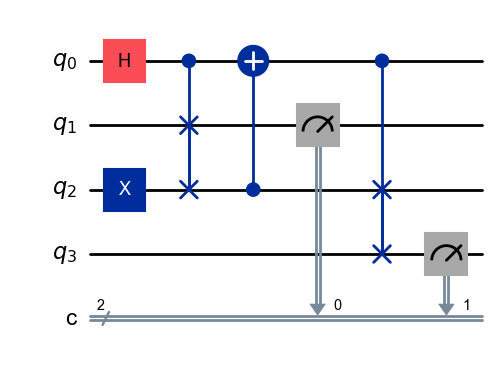

In [2]:
# test for 1 layer
n_qubits = 4
n_bits = 2

galton_1_circuit = QuantumCircuit(n_qubits,n_bits)

galton_1_circuit.h(0)
galton_1_circuit.x(2)
galton_1_circuit.cswap(0,1,2)
galton_1_circuit.cx(2,0)
galton_1_circuit.cswap(0,2,3)

for i in range(2):
    galton_1_circuit.measure((2*i + 1), i)

galton_1_circuit.draw(output='mpl')

---

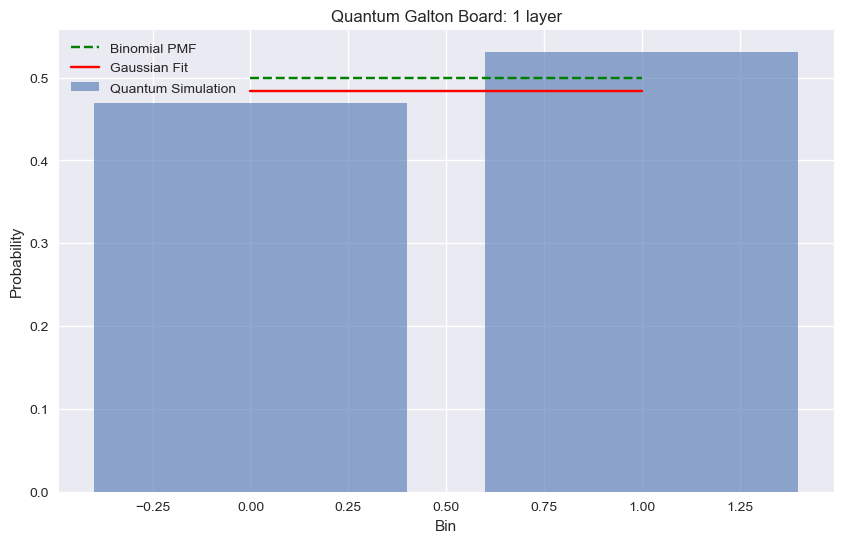

In [3]:
# 1-layer simulation
aer_sim = AerSimulator().run(galton_1_circuit, shots=1024)
answer = aer_sim.result().get_counts(galton_1_circuit)

# Map bitstrings to bin positions ("10" → 0, "01" → 1)
n_layers = 1  # Single peg layer
bin_mapping = {"10": 0, "01": 1}  # Your specified mapping
bins = np.array([bin_mapping.get(k, -1) for k in answer.keys()])  # -1 for invalid bitstrings
counts = np.array([v for v, k in zip(answer.values(), answer.keys()) if k in bin_mapping])  # Filter valid
probs = counts / 1024  # Normalize to probabilities

# Create full bin range (0 to n_layers) for plotting
x = np.arange(0, n_layers + 1)
quantum_probs = np.zeros(n_layers + 1)
for bin_pos, prob in zip(bins, probs):
    if 0 <= bin_pos <= n_layers:
        quantum_probs[bin_pos] = prob

# Plot with exact classical style
plt.figure(figsize=(10, 6))
plt.bar(x, quantum_probs, alpha=0.6, label='Quantum Simulation')
plt.plot(x, binom.pmf(x, n_layers, 0.5), 'g--', label='Binomial PMF')
plt.plot(x, norm.pdf(x, n_layers/2, np.sqrt(n_layers/4)), 'r-', label='Gaussian Fit')
plt.title('Quantum Galton Board: 1 layer')
plt.xlabel('Bin')
plt.ylabel('Probability')
plt.legend()
plt.show()

#### 5.3.1 Circuit Validation Markers

<div style="background-color: #fef9e7; padding: 15px; border-left: 5px solid #f39c12; border-radius: 8px;
box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif; color: #34495e; font-size: 16px;
max-width: 100%; width: 100%; word-wrap: break-word; box-sizing: border-box;">

  <p style="font-size: 14px;">
   The 1-layer circuit is executed using Qiskit’s `AerSimulator`, with 1024 shots collected to generate a histogram of outcomes. 
  Bitstrings are mapped (`"10" → 0`, `"01" → 1`) and converted into normalized probabilities. These results are plotted alongside the theoretical binomial probability mass function and its Gaussian approximation. 

  <ul style="font-size: 14px;">
<li> The histogram above converges to gaussian distribution upon increasing the no of simulation .The close match between simulation and theory confirms the circuit’s correctness and satisfies Task 2’s requirement for a Gaussian-like distribution.</li>
<li> The diagram of the circuit is in congruence with the circuit diagram in the paper.</li>
</ul>
</p>
</div>

---

### 5.4 Multi-Layer Extension

<div style="background-color: #eafaf1; padding: 15px; border-left: 5px solid #2ecc71; border-radius: 8px;
box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif; color: #34495e; font-size: 16px;
max-width: 100%; width: 100%; word-wrap: break-word; box-sizing: border-box;">

  <p style="font-size: 14px;">
    To simulate <i>n</i> layers, we stack peg modules. Each layer adds two qubits and reuses the control qubit after a <code>RESET</code> gate.
  </p>

  <p style="font-size: 14px;">
    The final quantum state is a superposition over all <i>n+1</i> paths, with measurement probabilities following the binomial distribution:
  </p>

  <div style="text-align: center; font-size: 16px; margin: 10px 0; color: #2c3e50; word-break: break-word;">
    <b><i>P(k) = C(n, k) · (1/2)<sup>n</sup></i></b>
  </div>

  <p style="font-size: 14px;">
    For large <i>n</i>, this converges to a Gaussian (mean = <i>n/2</i>, variance = <i>n/4</i>), replicating the classical Galton board behavior.
  </p>
</div>

---

#### 5.4.1 Explanation

<div style="background-color: #eafaf1; padding: 15px; border-left: 5px solid #2ecc71; border-radius: 8px;
box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif; color: #34495e; font-size: 16px;
max-width: 100%; width: 100%; word-wrap: break-word; box-sizing: border-box;">

  <p style="font-size: 14px;">

  We initiated the development of the Quantum Galton Board code by structuring it into the following sections:

  <ol style="font-size: 14px;">

  <li><b> Circuit Parameters</b>:

   <ul style="font-size: 14px;">
  <li>Ancilla is the 0th qubit.</li>

<li> For every layer, the initialization of ball on the board corresponds to the number of bin.</li>

<li>Explaining the variables: 
     <ul style="font-size: 14px;">
     <li>ball : the peg where has the ball strikes.</li>
    <li>layer : Number of layers.</li>
    <li>bin : number of bins for that particular layer.</li>
    </ul>
    </li>

  <li><b>First Layer Circuit </b> : 
  <ul style="font-size: 14px;">
  <li> Implements the basic 1-layer circuit</li>
   <li> we introduced a loop to differentiate using X gate for 1st layer as opposed to resetting ancilla.</li> </li></ul>

  <li><b> Other layer </b>: We adhered to the following sequence of gate operations -
  <ul style="font-size: 14px;">
  <li> <b> Hadamard gate </b> to ancillary qubit leveraging quantum superposition</li>

  <li> <b>Controlled-SWAP (CSWAP)</b> between two qubits using ancillary as the control to pass information about the possible trajectory taken by the ball in one direction. </li>

  <li> <b>CNot</b> to reset ancillary to 0 eigen state , to be reused as a control qubit in subsequent operations.</li>

  <li> Using <b>Controlled-SWAP (CSWAP)</b> using ancillatry as control to encode information regarding the possible path travelled by the ball in the other direction</li>

  <li>The final CSWAP gate of the preceding peg aligns with the initial CSWAP gate of the subsequent peg.  </li>

  <li>At the end of each layer we reset the ancillary qubit to ground state (0 eigen state) to use as control for further operations. </li>

  <li> All measurements were executed within a loop, and the circuit was drawn to confirm the implementation’s correctness.</li>
  </ul>
  </li>
  </ol>
  </p>

  <p style="font-size: 14px;">
  This modularization allowed us to debug each layer incrementally and ensure that gate operations aligned with expected bin transitions. Below we have executed the n-layer circuit for 6 layers.
</p>
</div>



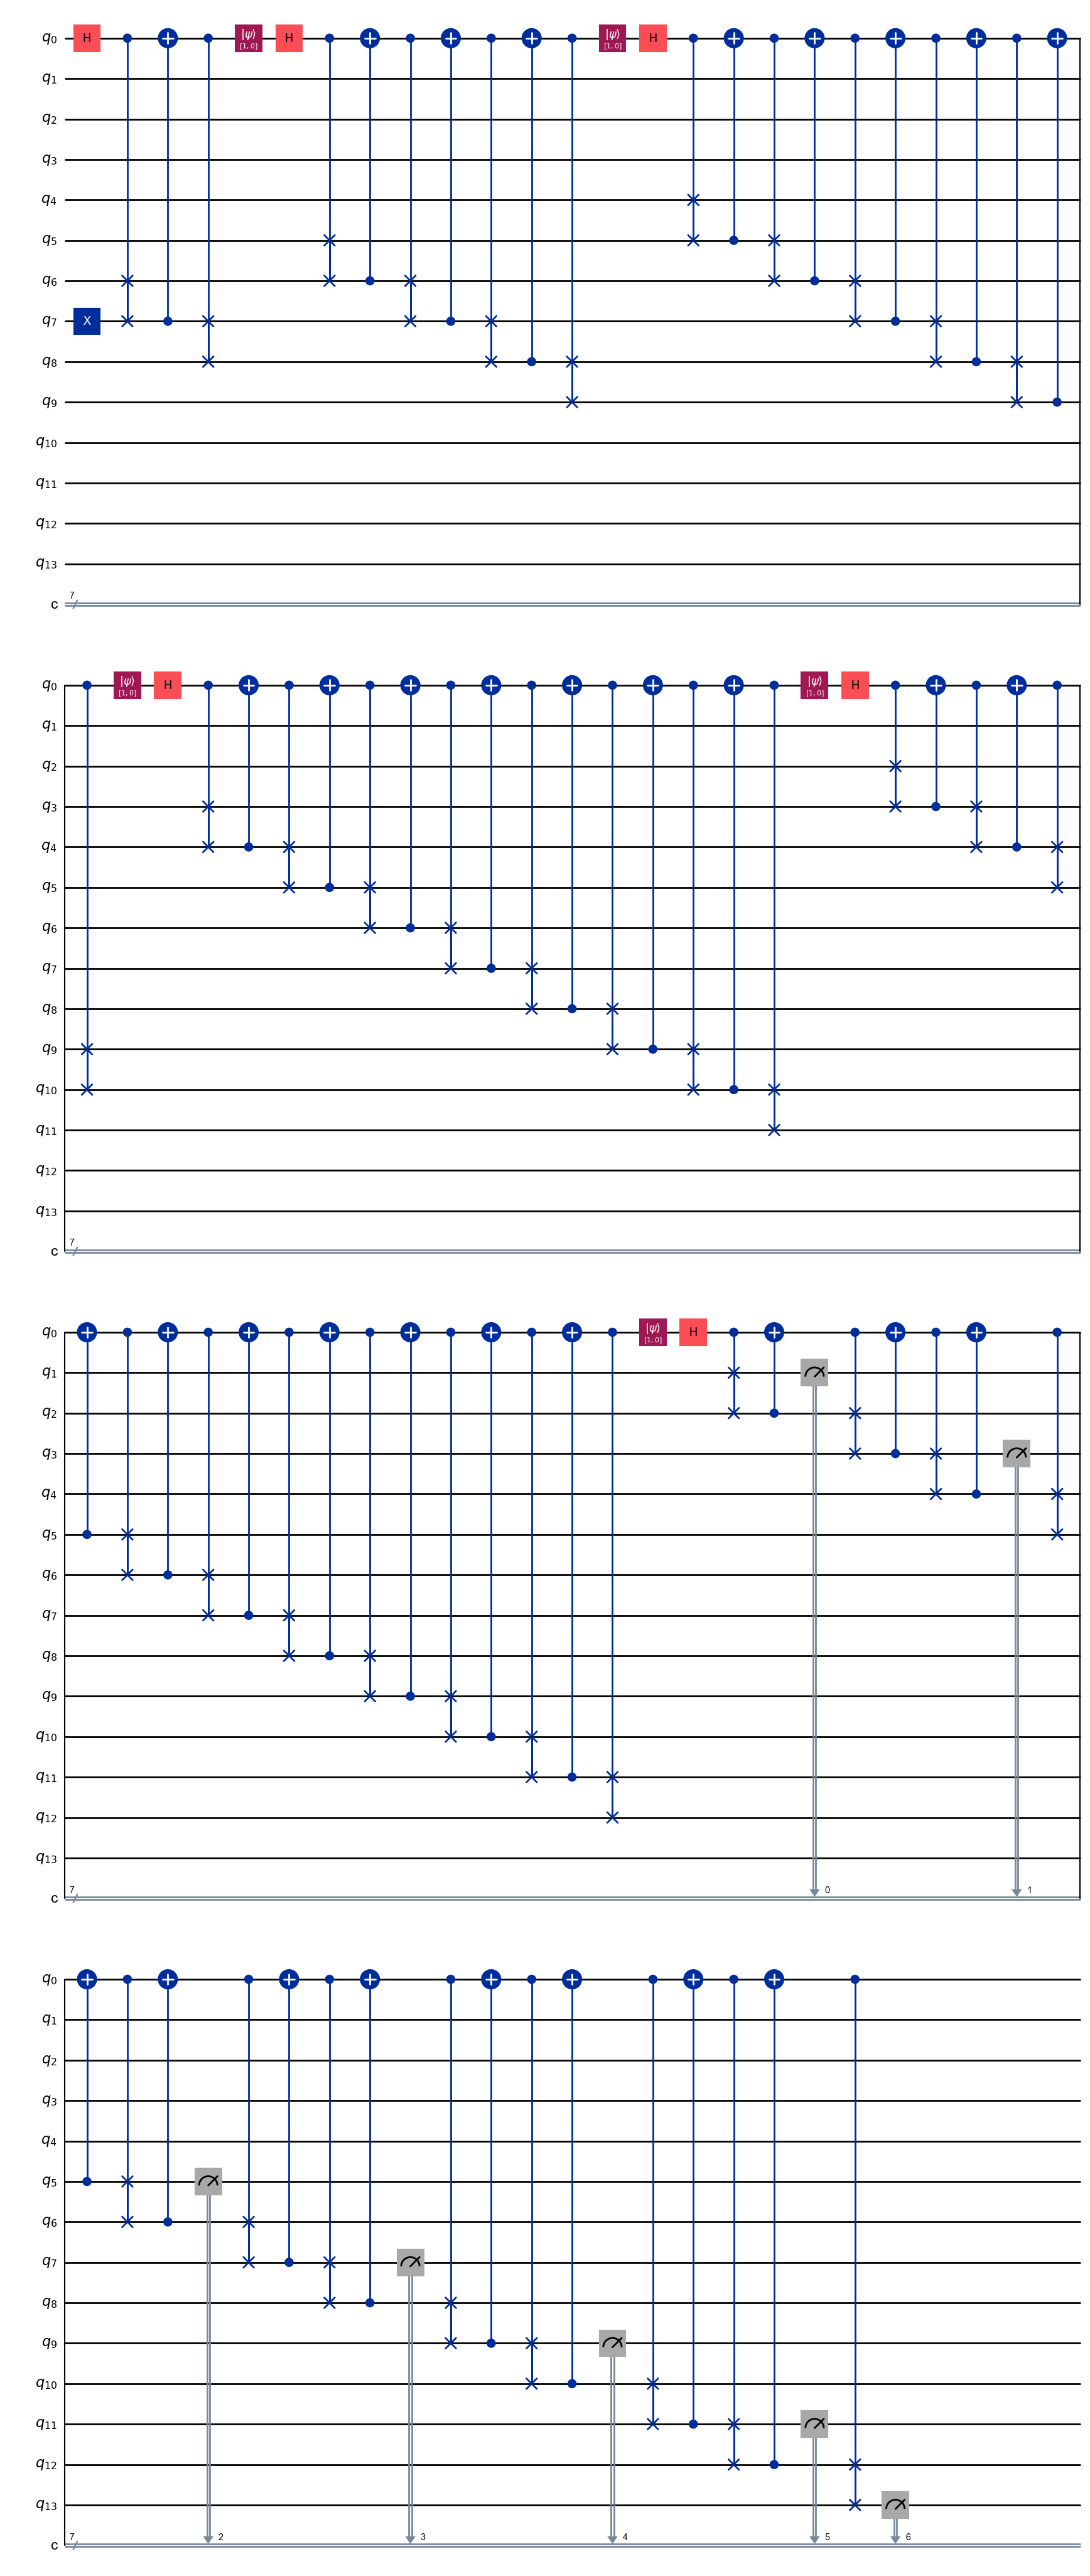

In [4]:
# test for n layers 

# classical information 
layers = 6
bins = layers + 1

# quantum circuit set up
n_qubits = (2*layers + 1) + 1
n_bits = bins

peg_circuit = QuantumCircuit(n_qubits,n_bits)

# define useful concepts
ancilla = 0
ball = bins

state_0 = [1,0]

def pegs(layer, qc):

    if(layer != 1):
        qc.initialize(state_0,ancilla)
        qc.h(ancilla)
    else:
        qc.h(ancilla)
        qc.x(ball)
    
    for j in range(0, (2*layer - 1)):
        base = ball - layer + j
        qc.cswap(ancilla, base, base + 1)
        qc.cx(base + 1, ancilla)
    
    base = ball + layer
    peg_circuit.cswap(ancilla, base - 1, base)


i = 1

while (i <= layers):
    pegs(i, peg_circuit)
    i = i + 1

# Measuring the qubits
for i in range(bins):
    peg_circuit.measure((2*i + 1), i)

# Diagram of the circuit
peg_circuit.draw(output='mpl')

---

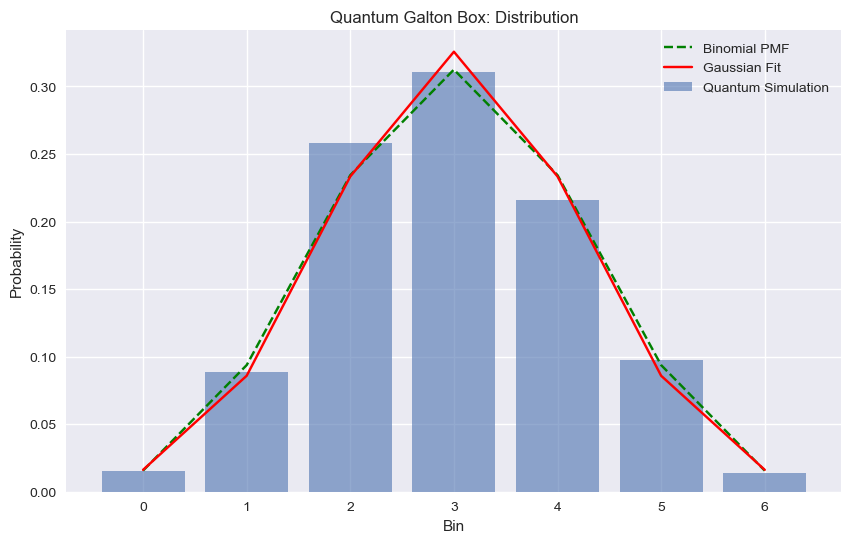

In [5]:
# n-layer simulation
aer_sim = AerSimulator().run(peg_circuit, shots=1024)
answer = aer_sim.result().get_counts(peg_circuit)

# Map bitstrings to bin positions (e.g., for n=3: "0001" → 0, "0010" → 1, "0100" → 2, "1000" → 3)
bin_mapping = {f"{'0' * (layers - i) + '1' + '0' * i}": i for i in range(layers + 1)}
bins = np.array([bin_mapping.get(k, -1) for k in answer.keys()])  # -1 for invalid bitstrings
counts = np.array([v for v, k in zip(answer.values(), answer.keys()) if k in bin_mapping])  # Filter valid
probs = counts / 1024  # Normalize to probabilities

# Create full bin range (0 to layers) for plotting
x = np.arange(0, layers + 1)
quantum_probs = np.zeros(layers + 1)
for bin_pos, prob in zip(bins, probs):
    if bin_pos != -1:  # Only use valid mappings
        quantum_probs[bin_pos] = prob

# Plot with exact classical style
plt.figure(figsize=(10, 6))
plt.bar(x, quantum_probs, alpha=0.6, label='Quantum Simulation')
plt.plot(x, binom.pmf(x, layers, 0.5), 'g--', label='Binomial PMF')
plt.plot(x, norm.pdf(x, layers/2, np.sqrt(layers/4)), 'r-', label='Gaussian Fit')
plt.title('Quantum Galton Box: Distribution')
plt.xlabel('Bin')
plt.ylabel('Probability')
plt.legend()
plt.show()

#### 5.4.2 Circuit Validation Markers

<div style="background-color: #eafaf1; padding: 15px; border-left: 5px solid #2ecc71; border-radius: 8px;
box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif; color: #34495e; font-size: 16px;
max-width: 100%; width: 100%; word-wrap: break-word; box-sizing: border-box;">

  <p style="font-size: 14px;">
The n-layer circuit is executed on Qiskit’s 'AerSimulator' with 1024 shots. 
Bitstrings are mapped to integer bins from '0' to 'n' (e.g., <code>0<sup>(n-i)</sup>1<sup>0^1</sup> → i</code>), and the resulting histogram is normalized to obtain probabilities. These are plotted alongside the theoretical binomial distribution and its Gaussian approximation, aligning with the classical Galton Board. The binomial distribution C(n, k) · (1/2)<sup>n</sup>, with mean 'n/2' and variance 'n/4', closely resembles a Gaussian for large 'n'. This validates the Quantum Galton Board’s correctness for Task 2 and lays the groundwork for biased walks (Task 3) and noise-aware optimization (Task 4).

  <ul style="font-size: 14px;">
  <li> The circuit drawn confirm correctness</li>
  <li>As expected, running the simulator for a larger number of shots causes the histogram to <strong> converge to a normal (Gaussian) distribution </strong>. </li>
  </ul>
  </p>
  </div>

---

## 6. Verification: Gaussian Approximation

<div style="background-color: #eafaf1; padding: 15px; border-left: 5px solid #2ecc71; border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif; color: #34495e; font-size: 16px; max-width: 100%; width: 100%; word-wrap: break-word; box-sizing: border-box; overflow-x: auto;">

To quantify how closely the quantum Galton board (QGB) matches the classical expectation, we compute the Kullback-Leibler (KL) divergence between three distributions: the simulated quantum output, the ideal binomial distribution, and its Gaussian approximation.

For small `n`, the QGB distribution exhibits slight deviations due to quantum sampling noise, but as `n` increases, the KL divergence between the QGB and the binomial sharply decreases. Likewise, the divergence between both the QGB and binomial vs. the Gaussian also drops, confirming that all three distributions converge as expected.

This validates the QGB’s fidelity and confirms that, under symmetric coin operations, quantum walks reproduce classical behavior in the limit—addressing Task 2 and laying the foundation for exploring asymmetry and noise in Tasks 3 and 4.

</div>


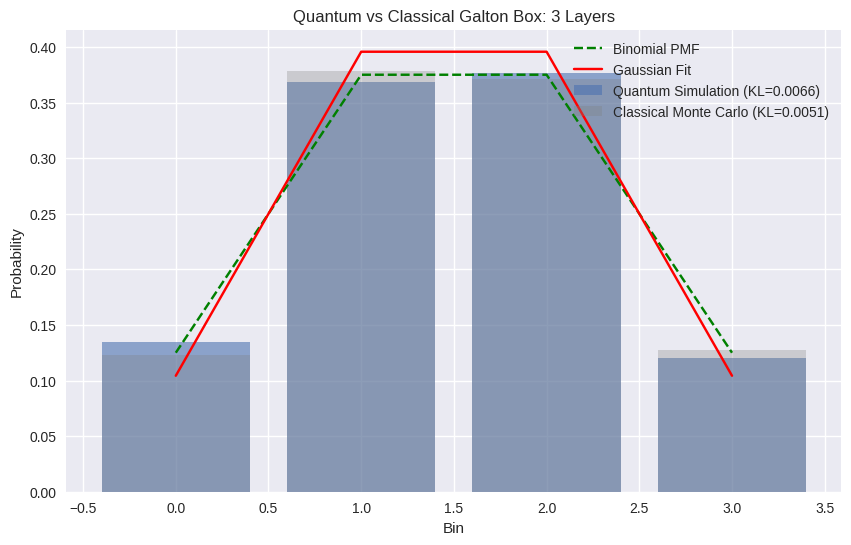

Quantum KL Divergence: 0.0066
Classical KL Divergence: 0.0051


In [ ]:
def galton_box_sim(N, M):
    bins = np.zeros(2 * N + 1)
    for _ in range(M):
        position = 0
        for _ in range(N):
            position += np.random.choice([-1, 1])
        bins[position + N] += 1
    return bins / M

# Parameters
n_layers = 3  # Replace with your desired number of layers
M = 10000  # Classical samples
shots = 1024  # Quantum shots
bins = n_layers + 1

# Classical simulation
classical_probs = galton_box_sim(n_layers, M)[::2]  # Corrected: extract even indices to map to 0 to n_layers bins

# Quantum simulation (your n-layer circuit, simplified for context)
n_qubits = (2 * n_layers + 1) + 1
n_bits = bins
peg_circuit = QuantumCircuit(n_qubits, n_bits)
# Your circuit setup (from "test for n layers")
state_0 = [1, 0]
ancilla = 0
ball = bins
def pegs(layer, qc):
    if layer != 1:
        qc.initialize(state_0, ancilla)
        qc.h(ancilla)
    else:
        qc.h(ancilla)
        qc.x(ball)
    for j in range(0, (2 * layer - 1)):
        base = ball - layer + j
        qc.cswap(ancilla, base, base + 1)
        qc.cx(base + 1, ancilla)
    base = ball + layer
    qc.cswap(ancilla, base - 1, base)
i = 1
while i <= n_layers:
    pegs(i, peg_circuit)
    i += 1
for i in range(bins):
    peg_circuit.measure((2 * i + 1), i)

# Run quantum simulation
aer_sim = AerSimulator().run(peg_circuit, shots=shots)
answer = aer_sim.result().get_counts(peg_circuit)

# Map bitstrings to bins
bin_mapping = {f"{'0' * (n_layers - i) + '1' + '0' * i}": i for i in range(n_layers + 1)}
bins_pos = np.array([bin_mapping.get(k, -1) for k in answer.keys()])
counts = np.array([v for v, k in zip(answer.values(), answer.keys()) if k in bin_mapping])
quantum_probs = counts / shots
quantum_probs_full = np.zeros(n_layers + 1)
for bin_pos, prob in zip(bins_pos, quantum_probs):
    if bin_pos != -1:
        quantum_probs_full[bin_pos] = prob

# Gaussian target distribution
x = np.arange(0, n_layers + 1)
gaussian_probs = norm.pdf(x, n_layers/2, np.sqrt(n_layers/4))
gaussian_probs /= np.sum(gaussian_probs)  # Normalize to sum to 1

# Compute KL divergence (add small epsilon to avoid log(0))
epsilon = 1e-10
quantum_kl = np.sum(kl_div(quantum_probs_full + epsilon, gaussian_probs + epsilon))
classical_kl = np.sum(kl_div(classical_probs + epsilon, gaussian_probs + epsilon))

# Plot with your classical style
plt.figure(figsize=(10, 6))
plt.bar(x, quantum_probs_full, alpha=0.6, label=f'Quantum Simulation (KL={quantum_kl:.4f})')
plt.bar(x, classical_probs, alpha=0.3, label=f'Classical Monte Carlo (KL={classical_kl:.4f})', color='gray')
plt.plot(x, binom.pmf(x, n_layers, 0.5), 'g--', label='Binomial PMF')
plt.plot(x, gaussian_probs, 'r-', label='Gaussian Fit')
plt.title(f'Quantum vs Classical Galton Box: {n_layers} Layers')
plt.xlabel('Bin')
plt.ylabel('Probability')
plt.legend()
plt.show()

print(f"Quantum KL Divergence: {quantum_kl:.4f}")
print(f"Classical KL Divergence: {classical_kl:.4f}")

---

## 7 Quantum Advantage

<div style="background-color: #f4ecf7; padding: 15px; border-left: 5px solid #9b59b6; border-radius: 8px;
box-shadow: 0 4px 6px rgba(0,0,0,0.05); font-family: Arial, sans-serif; color: #34495e; font-size: 16px;
max-width: 100%; width: 100%; word-wrap: break-word; box-sizing: border-box;">

  <p style="font-size: 14px;">
    Classical Monte Carlo simulation of binomial distributions requires <i>O(n·m)</i> operations for <i>n</i> layers and <i>m</i> samples.
    The QGB computes all <i>2ⁿ</i> paths in just <i>O(n²)</i> gates via quantum superposition.
  </p>

  <p style="font-size: 14px;">
    This provides a strong case for quantum acceleration in modeling stochastic PDEs — directly supporting applications in sustainable energy, quantum chemistry, and high-dimensional physics simulations.
  </p>
</div>

---

#### References
1. Carney, M., & Varcoe, B. (2022). Universal Statistical Simulator. arXiv:2202.01735.
2. Galton, F. (1889). *Natural Inheritance*. Macmillan.
3. Feller, W. (1968). *An Introduction to Probability Theory and Its Applications*. Wiley.